# Get started with XGBoost Python


## 1 Gradient Boosting

Gradient Boosting involves 3 elements:
- A loss function to be optimized
- A weak learner to make predictions
- An additive model, to add weak learners to minimize the loss function

## 2. XGBoost
An implementation of gradient boosted decision trees, with speed provided by the engineering of the implementation, including:
- Parallelization
- Distributed Computing
- Out-of-core Computing
- Cache Optimization

## 3. First XGBoost model

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# load data
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=",")

print(type(dataset))
print(dataset)

<class 'numpy.ndarray'>
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [3]:
# split data to X and y
X = dataset[:, :8]
y = dataset[:, 8]

# train-test split
# Add validation set, with rate: 70% Test - 15% Val - 15% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
print(X_train)
print(y_train)

[[1.50e+01 1.36e+02 7.00e+01 ... 3.71e+01 1.53e-01 4.30e+01]
 [0.00e+00 9.70e+01 6.40e+01 ... 3.68e+01 6.00e-01 2.50e+01]
 [1.00e+00 1.16e+02 7.00e+01 ... 2.74e+01 2.04e-01 2.10e+01]
 ...
 [1.30e+01 1.26e+02 9.00e+01 ... 4.34e+01 5.83e-01 4.20e+01]
 [4.00e+00 1.71e+02 7.20e+01 ... 4.36e+01 4.79e-01 2.60e+01]
 [9.00e+00 1.02e+02 7.60e+01 ... 3.29e+01 6.65e-01 4.60e+01]]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0

In [7]:
# fit model
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train, eval_metric='logloss')

# test model
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7705627705627706


## 4. Monitor Performance and Early Stopping

Parameters for early stopping:
- ```eval_set```
- ```eval_metric```
- ```early_stopping_rounds```

In [12]:
# Add validation set, with rate: 70% Test - 15% Val - 15% Test
X_train, X_left, y_train, y_left = train_test_split(X,y,train_size= 0.7, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=0.5, random_state=1)

eval_set = [(X_val, y_val)]

In [14]:
model = XGBClassifier(use_label_encoder=False)
#model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=eval_set, eval_metric=['logloss'], verbose=True )

# fit model without early stopping
model.fit(X_train, y_train, eval_set=eval_set, eval_metric=['logloss'], verbose=True )

# make prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[0]	validation_0-logloss:0.58967
[1]	validation_0-logloss:0.54411
[2]	validation_0-logloss:0.51770
[3]	validation_0-logloss:0.48411
[4]	validation_0-logloss:0.47285
[5]	validation_0-logloss:0.46039
[6]	validation_0-logloss:0.45860
[7]	validation_0-logloss:0.45989
[8]	validation_0-logloss:0.44784
[9]	validation_0-logloss:0.44262
[10]	validation_0-logloss:0.44435
[11]	validation_0-logloss:0.44133
[12]	validation_0-logloss:0.43392
[13]	validation_0-logloss:0.43143
[14]	validation_0-logloss:0.43245
[15]	validation_0-logloss:0.43132
[16]	validation_0-logloss:0.43310
[17]	validation_0-logloss:0.42927
[18]	validation_0-logloss:0.42376
[19]	validation_0-logloss:0.41949
[20]	validation_0-logloss:0.41877
[21]	validation_0-logloss:0.41909
[22]	validation_0-logloss:0.41942
[23]	validation_0-logloss:0.42279
[24]	validation_0-logloss:0.42228
[25]	validation_0-logloss:0.42595
[26]	validation_0-logloss:0.42955
[27]	validation_0-logloss:0.42612
[28]	validation_0-logloss:0.43093
[29]	validation_0-loglos

In [15]:
# retrieve performance metrics
results = model.evals_result()
print(results)
epoch = len(results['validation_0']['logloss'])
print(epoch)

{'validation_0': OrderedDict([('logloss', [0.589672, 0.544106, 0.517701, 0.484108, 0.472846, 0.460386, 0.458597, 0.459891, 0.44784, 0.442618, 0.444353, 0.441326, 0.433919, 0.431432, 0.432451, 0.431324, 0.433096, 0.429274, 0.423762, 0.419491, 0.41877, 0.419089, 0.419424, 0.422791, 0.422284, 0.425948, 0.429554, 0.426122, 0.430926, 0.432383, 0.436343, 0.439678, 0.439685, 0.43778, 0.44013, 0.443829, 0.451045, 0.453656, 0.451986, 0.457531, 0.458518, 0.462262, 0.463279, 0.46832, 0.466191, 0.466455, 0.46598, 0.467578, 0.468376, 0.471852, 0.470898, 0.475239, 0.475273, 0.476881, 0.477383, 0.479287, 0.480786, 0.483265, 0.486033, 0.480787, 0.480324, 0.480016, 0.483494, 0.486701, 0.490461, 0.491584, 0.490982, 0.491773, 0.493155, 0.494105, 0.500458, 0.502889, 0.507532, 0.509261, 0.507165, 0.509699, 0.510004, 0.511321, 0.517684, 0.520059, 0.522664, 0.525711, 0.525124, 0.525101, 0.524467, 0.527257, 0.529596, 0.529769, 0.530097, 0.532493, 0.536735, 0.53841, 0.534342, 0.535712, 0.534985, 0.538358, 0.54

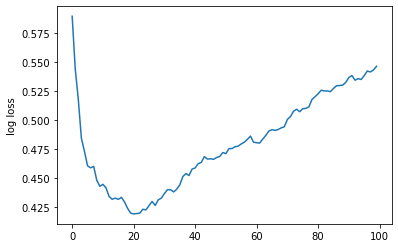

In [19]:
# plot log loss
x_axis = range(0, epoch)
plt.plot(x_axis, results['validation_0']['logloss'])
plt.ylabel("log loss")
plt.show()


In [20]:
# fit model with early stopping
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set, verbose=True)

# make prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[0]	validation_0-logloss:0.58967
[1]	validation_0-logloss:0.54411
[2]	validation_0-logloss:0.51770
[3]	validation_0-logloss:0.48411
[4]	validation_0-logloss:0.47285
[5]	validation_0-logloss:0.46039
[6]	validation_0-logloss:0.45860
[7]	validation_0-logloss:0.45989
[8]	validation_0-logloss:0.44784
[9]	validation_0-logloss:0.44262
[10]	validation_0-logloss:0.44435
[11]	validation_0-logloss:0.44133
[12]	validation_0-logloss:0.43392
[13]	validation_0-logloss:0.43143
[14]	validation_0-logloss:0.43245
[15]	validation_0-logloss:0.43132
[16]	validation_0-logloss:0.43310
[17]	validation_0-logloss:0.42927
[18]	validation_0-logloss:0.42376
[19]	validation_0-logloss:0.41949
[20]	validation_0-logloss:0.41877
[21]	validation_0-logloss:0.41909
[22]	validation_0-logloss:0.41942
[23]	validation_0-logloss:0.42279
[24]	validation_0-logloss:0.42228
[25]	validation_0-logloss:0.42595
[26]	validation_0-logloss:0.42955
[27]	validation_0-logloss:0.42612
[28]	validation_0-logloss:0.43093
[29]	validation_0-loglos

## 5. Feature Importance with XGBoost

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for.


[0.08915061 0.24205089 0.10710493 0.08583774 0.10389856 0.1482233
 0.09711989 0.12661403]


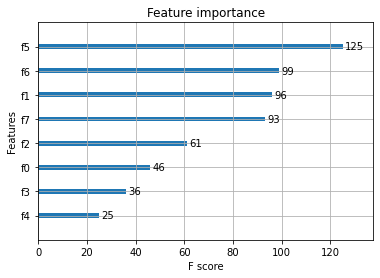

In [26]:
from xgboost import plot_importance
print(model.feature_importances_)

plot_importance(model)
plt.show()

### Feature Selection

We can use ```SelectFromModel``` class. It can take a pre-trained model, the use a threshold to decide which features to select.
This threshold then can be used to ```transform``` X and y.


In [50]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# threshold:
threshold = sort(model.feature_importances_)
for thres in threshold:
    # initiate the selection object:
    selection = SelectFromModel(model, threshold=thres, prefit=True)
    # transfrom X
    X_train_selected = selection.transform(X_train)
    X_test_selected = selection.transform(X_test)

    #train model
    model_selected = XGBClassifier(use_label_encoder=False)
    model_selected.fit(X_train_selected, y_train, eval_metric='logloss')
    #evaluate model
    y_pred = model_selected.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print('Threshold: {:3f} ; Accuracy: {:3f}'.format(thres, accuracy))

Threshold: 0.085838 ; Accuracy: 0.750000
Threshold: 0.089151 ; Accuracy: 0.750000
Threshold: 0.097120 ; Accuracy: 0.750000
Threshold: 0.103899 ; Accuracy: 0.767241
Threshold: 0.107105 ; Accuracy: 0.724138
Threshold: 0.126614 ; Accuracy: 0.732759
Threshold: 0.148223 ; Accuracy: 0.750000
Threshold: 0.242051 ; Accuracy: 0.706897


We can see that the accuracy does decrease as we decrease the threshold (a.k.a. increase the number of features)

## 6. Configure Gradient Boosting

- ```learning_rate```: should be 0.1 or lower
- ```max_depth```: should be 2-8
- ```subsample```: 30% to 80% of the training dataset

In [ ]:
## 7. XGBoost Hyperparameter tuning
